# PCA实战
1、基于iris_data.csv数据，建立KNN模型实现数据分类  
2、对数据进行标准化处理，选取一个维度可视化处理后的效果  
3、进行与原数据等维度PCA，查看各主成分的方差比例  
4、保留合适的主成分，可视化降维后的数据  
5、基于降维后的数据建立KNN模型，与原数据表现进行对比  

In [1]:
#load data
import numpy as np
import pandas as pd
data = pd.read_csv('iris_data.csv')
data.head()

,sepal length,sepal width,petal length,petal width,target,label
0,5.1,3.5,1.4,0.2,Iris-setosa,0
1,4.9,3.0,1.4,0.2,Iris-setosa,0
2,4.7,3.2,1.3,0.2,Iris-setosa,0
3,4.6,3.1,1.5,0.2,Iris-setosa,0
4,5.0,3.6,1.4,0.2,Iris-setosa,0


In [2]:
#define X and y
X = data.drop(['target', 'label'], axis=1)
y = data.loc[:, 'label']
#establish knn model
from sklearn.neighbors import KNeighborsClassifier
KNN = KNeighborsClassifier(n_neighbors=3)
KNN.fit(X, y)
y_predict = KNN.predict(X)
#calculate the accuracy
from sklearn.metrics import accuracy_score
accuracy1 = accuracy_score(y, y_predict)
accuracy1

0.96

In [3]:
from sklearn.preprocessing import StandardScaler
X_norm = StandardScaler().fit_transform(X)
print(X_norm)

[[-9.00681170e-01  1.03205722e+00 -1.34127240e+00 -1.31297673e+00]
 [-1.14301691e+00 -1.24957601e-01 -1.34127240e+00 -1.31297673e+00]
 [-1.38535265e+00  3.37848329e-01 -1.39813811e+00 -1.31297673e+00]
 [-1.50652052e+00  1.06445364e-01 -1.28440670e+00 -1.31297673e+00]
 [-1.02184904e+00  1.26346019e+00 -1.34127240e+00 -1.31297673e+00]
 [-5.37177559e-01  1.95766909e+00 -1.17067529e+00 -1.05003079e+00]
 [-1.50652052e+00  8.00654259e-01 -1.34127240e+00 -1.18150376e+00]
 [-1.02184904e+00  8.00654259e-01 -1.28440670e+00 -1.31297673e+00]
 [-1.74885626e+00 -3.56360566e-01 -1.34127240e+00 -1.31297673e+00]
 [-1.14301691e+00  1.06445364e-01 -1.28440670e+00 -1.44444970e+00]
 [-5.37177559e-01  1.49486315e+00 -1.28440670e+00 -1.31297673e+00]
 [-1.26418478e+00  8.00654259e-01 -1.22754100e+00 -1.31297673e+00]
 [-1.26418478e+00 -1.24957601e-01 -1.34127240e+00 -1.44444970e+00]
 [-1.87002413e+00 -1.24957601e-01 -1.51186952e+00 -1.44444970e+00]
 [-5.25060772e-02  2.18907205e+00 -1.45500381e+00 -1.31297673e

In [4]:
#calculate the mean and sigma
x1 = X['sepal length']
x1_norm = X_norm[:, 0]
print(x1.mean(), x1.std(), '\n', x1_norm.mean(), x1_norm.std())

5.843333333333335 0.8280661279778629 
 -4.736951571734001e-16 1.0


/Users/fengdeyu/opt/anaconda3/lib/python3.7/site-packages/matplotlib/backends/backend_agg.py:211: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/Users/fengdeyu/opt/anaconda3/lib/python3.7/site-packages/matplotlib/backends/backend_agg.py:180: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0, flags=flags)


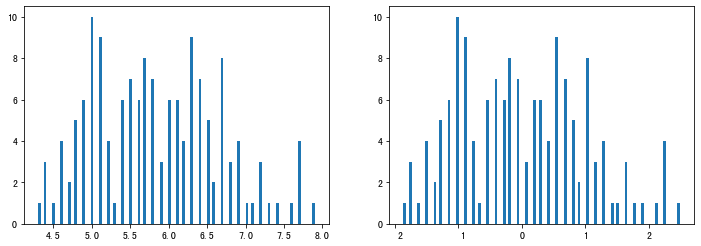

In [5]:
from matplotlib import pyplot as plt
fig1 = plt.figure(figsize=(12, 4))
plt.subplot(121)
plt.hist(x1, bins=100)
plt.subplot(122)
plt.hist(x1_norm, bins=100)
plt.show()

In [6]:
#pca analysis
from sklearn.decomposition import PCA
pca = PCA(n_components=4)
X_pac = pca.fit_transform(X_norm)
#calculate the variance ratio of each principle components
var_ratio = pca.explained_variance_ratio_

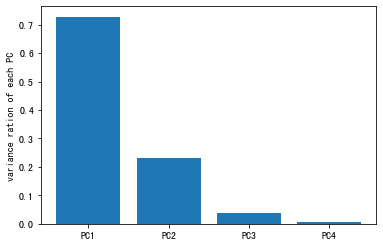

In [7]:
fig2 = plt.figure()
plt.bar([1, 2, 3, 4], var_ratio)
plt.xticks([1, 2, 3, 4], ['PC1', 'PC2', 'PC3', 'PC4'])
plt.ylabel('variance ration of each PC')
plt.show()

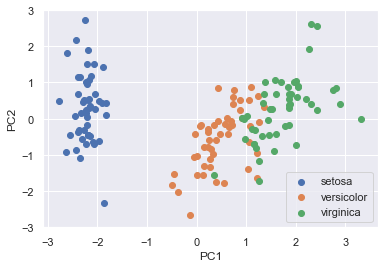

In [12]:
import seaborn as sns
sns.set()
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_norm)
#visualize the PCA result
fig3 = plt.figure()
setosa = plt.scatter(X_pca[:, 0][y == 0], X_pca[:, 1][y == 0])
versicolor = plt.scatter(X_pca[:, 0][y == 1], X_pca[:, 1][y == 1])
virginica = plt.scatter(X_pca[:, 0][y == 2], X_pca[:, 1][y == 2])
plt.legend([setosa, versicolor, virginica],
           ['setosa', 'versicolor', 'virginica'])
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.show()

In [13]:
KNN = KNeighborsClassifier(n_neighbors=3)
KNN.fit(X_pca, y)
y_predict = KNN.predict(X_pca)
accuracy2 = accuracy_score(y, y_predict)
accuracy2

0.9466666666666667

PCA实战summary  
1、通过计算数据对应的主成分（principle components),可在减少数据维度同时尽可能保留主要信息。  
2、为确定合适的主成分维度，可先对数据进行与原数据相同维度的PCA处理，再根据各个成分的数据方差确认主成分维度  
